## Taxi Fare Prediction

<a id='import_lib'></a>
# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

<a id='set_options'></a>
# 2. Set Options

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
# pd.options.display.max_rows = None

<a id='Read_Data'></a>
# 3. Read Data

In [3]:
# read csv file using pandas
df_taxi = pd.read_csv('TaxiFare.csv')

In [4]:
# display the top 5 rows of the dataframe
df_taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
# Checking for duplicates
df_taxi[df_taxi.duplicated()]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


#### There is No duplicate values

In [6]:
df_taxi.shape

(50000, 8)

The column `unique_id` contains the unique identifier for each observation, which is redundant for further analysis. Thus, we drop this column.

In [7]:
# Before droping any column its better to save the data in other location
df = df_taxi.copy(deep=True)

In [8]:
df_taxi.drop('unique_id',axis=1,inplace=True)

<a id='data_preparation'></a>
# 4. Prepare and Analyze the Data

<a id='Data_Understanding'></a>
## 4.1 Understand the Data

In [9]:
# 'shape' returns the dimensions of the data
df_taxi.shape

(50000, 7)

<a id='Data_Types'></a>
### 4.1.1 Data Type



In [10]:
# use 'dtypes' to check the data type of each variable
df_taxi.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

**2. Change the incorrect data type.**

In [11]:
# convert object to datetime using to_datetime method from pandas
#if error is set to'coerce', then invalid parsing will be set as NaN.
df_taxi.date_time_of_pickup = pd.to_datetime(df_taxi.date_time_of_pickup, errors='coerce')

**3. Recheck the data type after the conversion.**

In [12]:
# recheck the data type of each column
df_taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [13]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
# extract various date time components as seperate variables
df_taxi = df_taxi.assign(hour = df_taxi.date_time_of_pickup.dt.hour,
                         day = df_taxi.date_time_of_pickup.dt.day,
                        month = df_taxi.date_time_of_pickup.dt.month,
                        year = df_taxi.date_time_of_pickup.dt.year,
                        dayofweek = df_taxi.date_time_of_pickup.dt.dayofweek)

In [15]:
# drop the column 'date_time_of_pickup' using drop()
# 'axis = 1' drops the specified column

df_taxi = df_taxi.drop('date_time_of_pickup',axis=1)

In [16]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int32  
 7   day                   50000 non-null  int32  
 8   month                 50000 non-null  int32  
 9   year                  50000 non-null  int32  
 10  dayofweek             50000 non-null  int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 3.2 MB


In [17]:
df_taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,15.672040,6.273300,2011.739260,3.029980
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,8.660789,3.461157,1.862639,1.956936
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


### Checking for Missing Values

In [18]:
df_taxi.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
day                     0
month                   0
year                    0
dayofweek               0
dtype: int64

### There is no missing values in the datset

In [19]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int32  
 7   day                   50000 non-null  int32  
 8   month                 50000 non-null  int32  
 9   year                  50000 non-null  int32  
 10  dayofweek             50000 non-null  int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 3.2 MB


<a id='EDA'></a>
## 4.2 Exploratory Data Analysis

### 4.2.1 Year info

<Axes: xlabel='year', ylabel='count'>

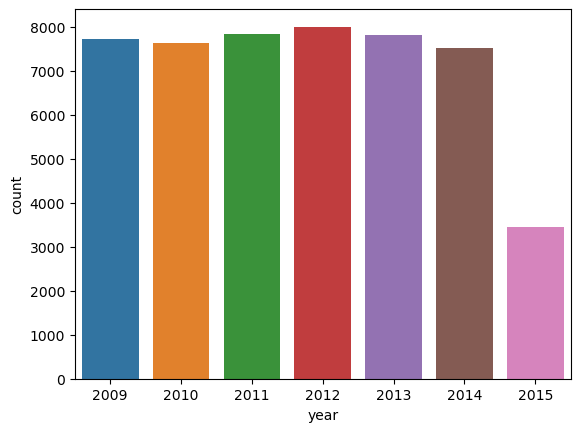

In [20]:
sns.countplot(x = df_taxi.year)

In [21]:
df_taxi.year.value_counts()

year
2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: count, dtype: int64

### Now will check what was the average fair price based on yearly

In [22]:
df_taxi.groupby('year')['amount'].mean()

year
2009    10.049168
2010    10.137180
2011    10.465931
2012    11.228863
2013    12.439474
2014    13.139649
2015    13.064392
Name: amount, dtype: float64

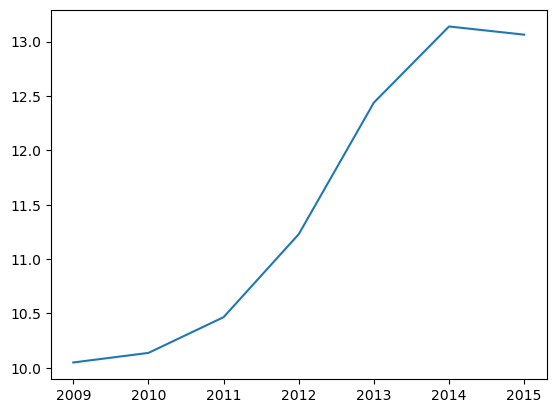

In [23]:
plt.plot(df_taxi.groupby('year')['amount'].mean())

### we can see that year on year the fare is increasing, so this might be the case for the drop of passenger yearly

In [24]:
df_taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


### Month

In [25]:
df_taxi.month.value_counts()

month
3     4671
5     4612
1     4546
4     4519
6     4516
2     4302
10    4046
12    4015
9     3810
11    3764
7     3656
8     3543
Name: count, dtype: int64

In [26]:
df_taxi.month.value_counts().index

Index([3, 5, 1, 4, 6, 2, 10, 12, 9, 11, 7, 8], dtype='int32', name='month')

<Axes: xlabel='month', ylabel='count'>

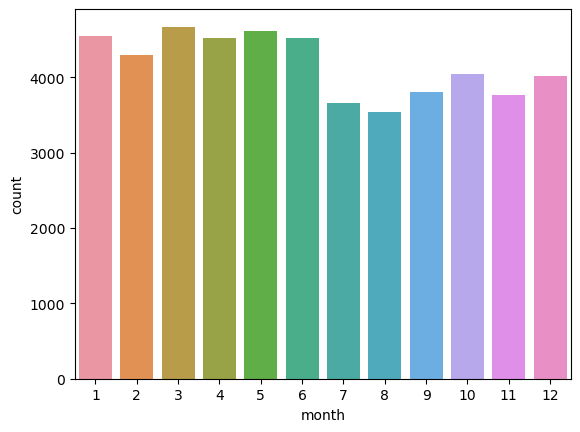

In [27]:
sns.countplot(x = df_taxi.month)

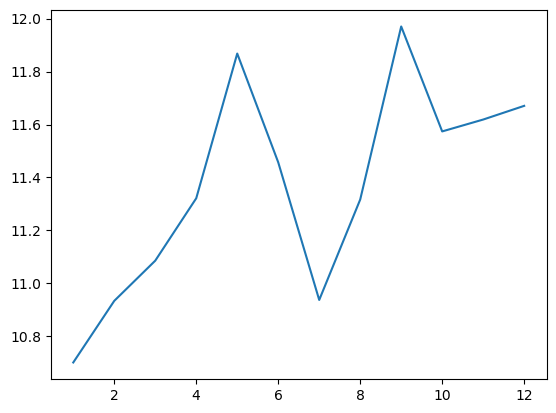

In [28]:
plt.plot(df_taxi.groupby('month')['amount'].mean())

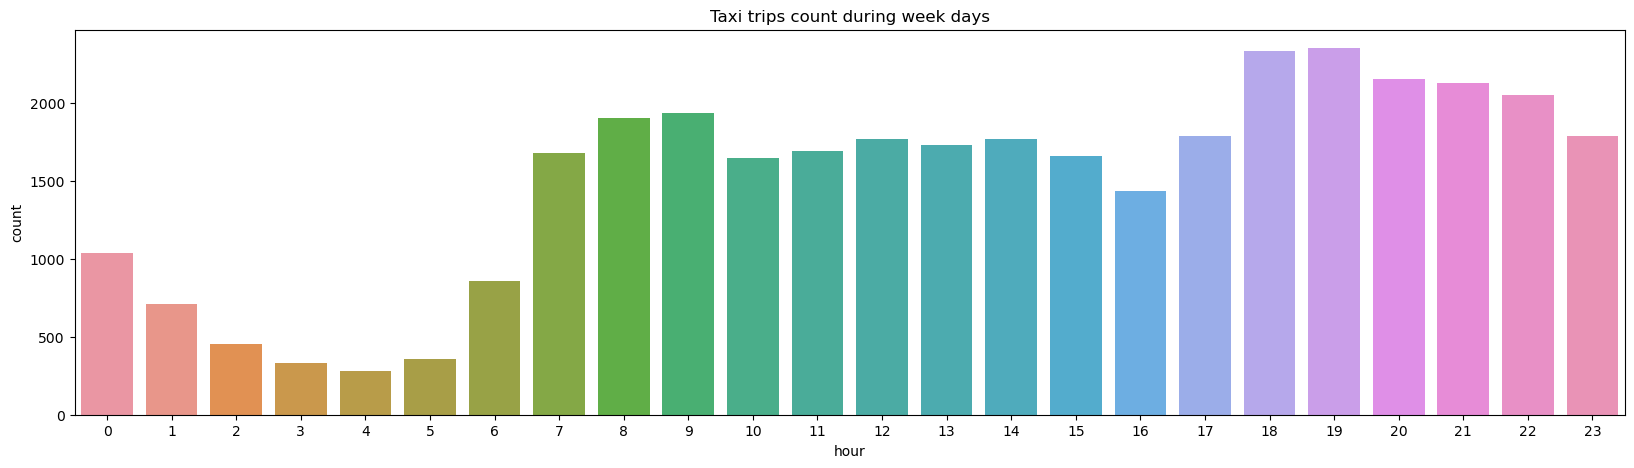

In [29]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week days')
#plot the countplot for weekdays
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <=4)])
plt.show()

We see that during the weekdays the count of trips start to peak from 7 am and is highest at 9am. In the evening the peak is at 6pm and 7pm.

<Axes: title={'center': 'Taxi trips count during week ends'}, xlabel='hour', ylabel='count'>

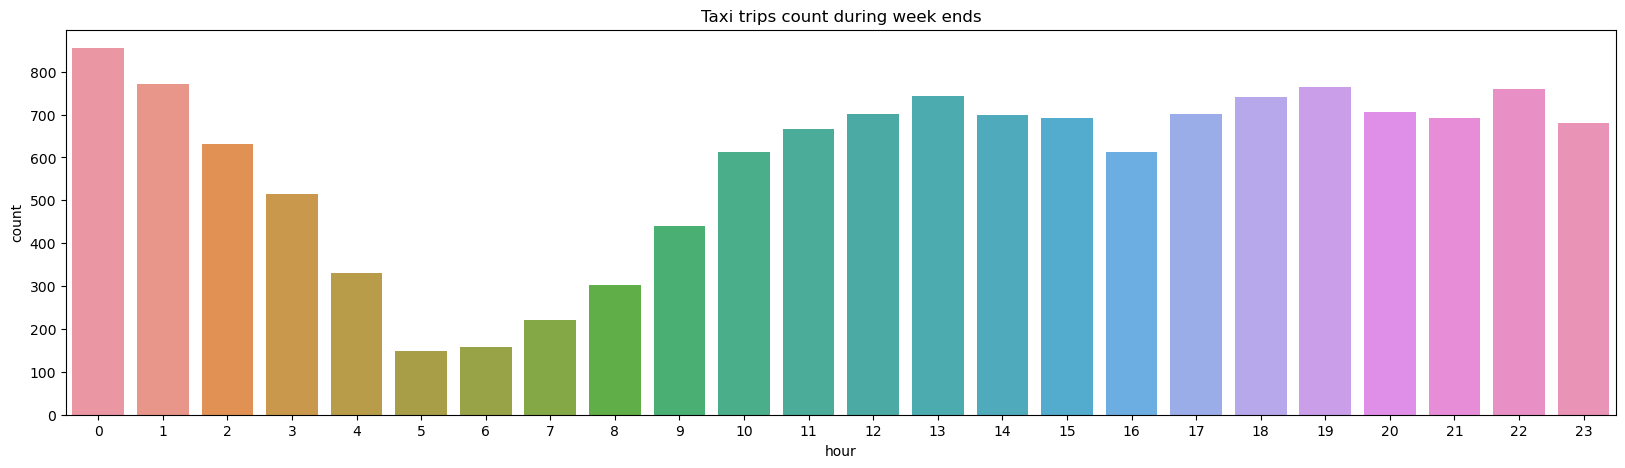

In [30]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week ends')
#plot the countplot for weekends
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <=6)])

We see that during the weekends the count of trips is high after 12 midnight to 3am to 4am. This pattern is different from the weekdays. In the evening the demand is almost evenly high after 6pm till late night except.

### From the above plot, we can notice that the pattern for demand of taxi is different for weekdays and weekends.

### 4.2.2 Average fare for each hour during weekdays and weekends

**1. Compute the hourly average fare for weekdays and weekends**

In [31]:
# Set the days in the dataset as week days and week ends
week_days = df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <= 4)]
week_ends = df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <= 6)]
# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

**2. Plot the mean fare**

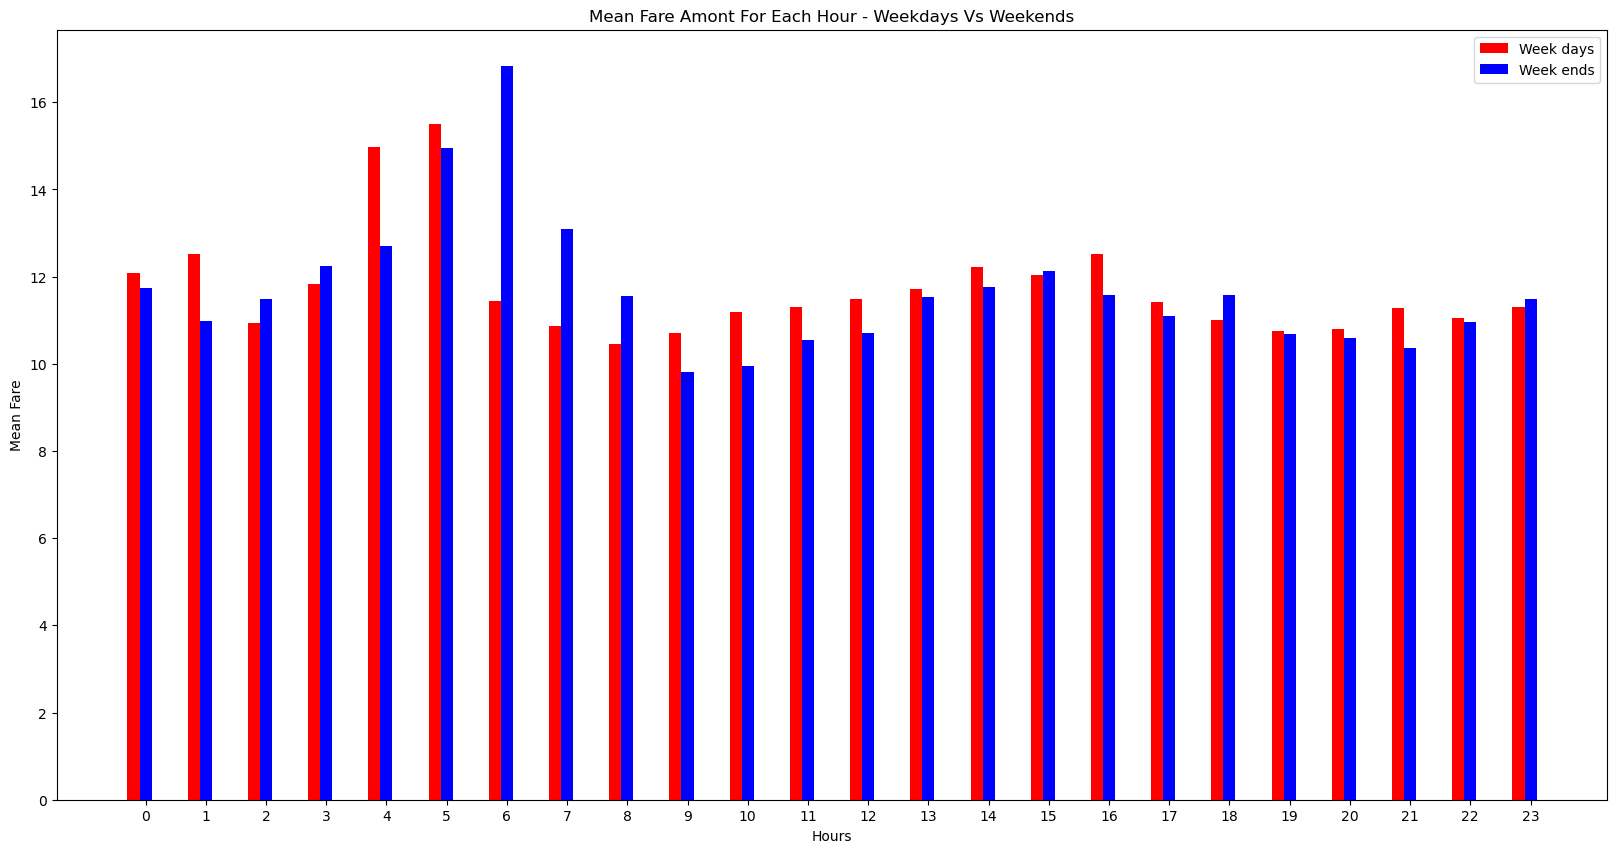

In [32]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()


We notice that the average fares for each hour are different for week days and week ends. Average fare for weekdays during morning hours 6,7 and 8 is much less compared to weekends.

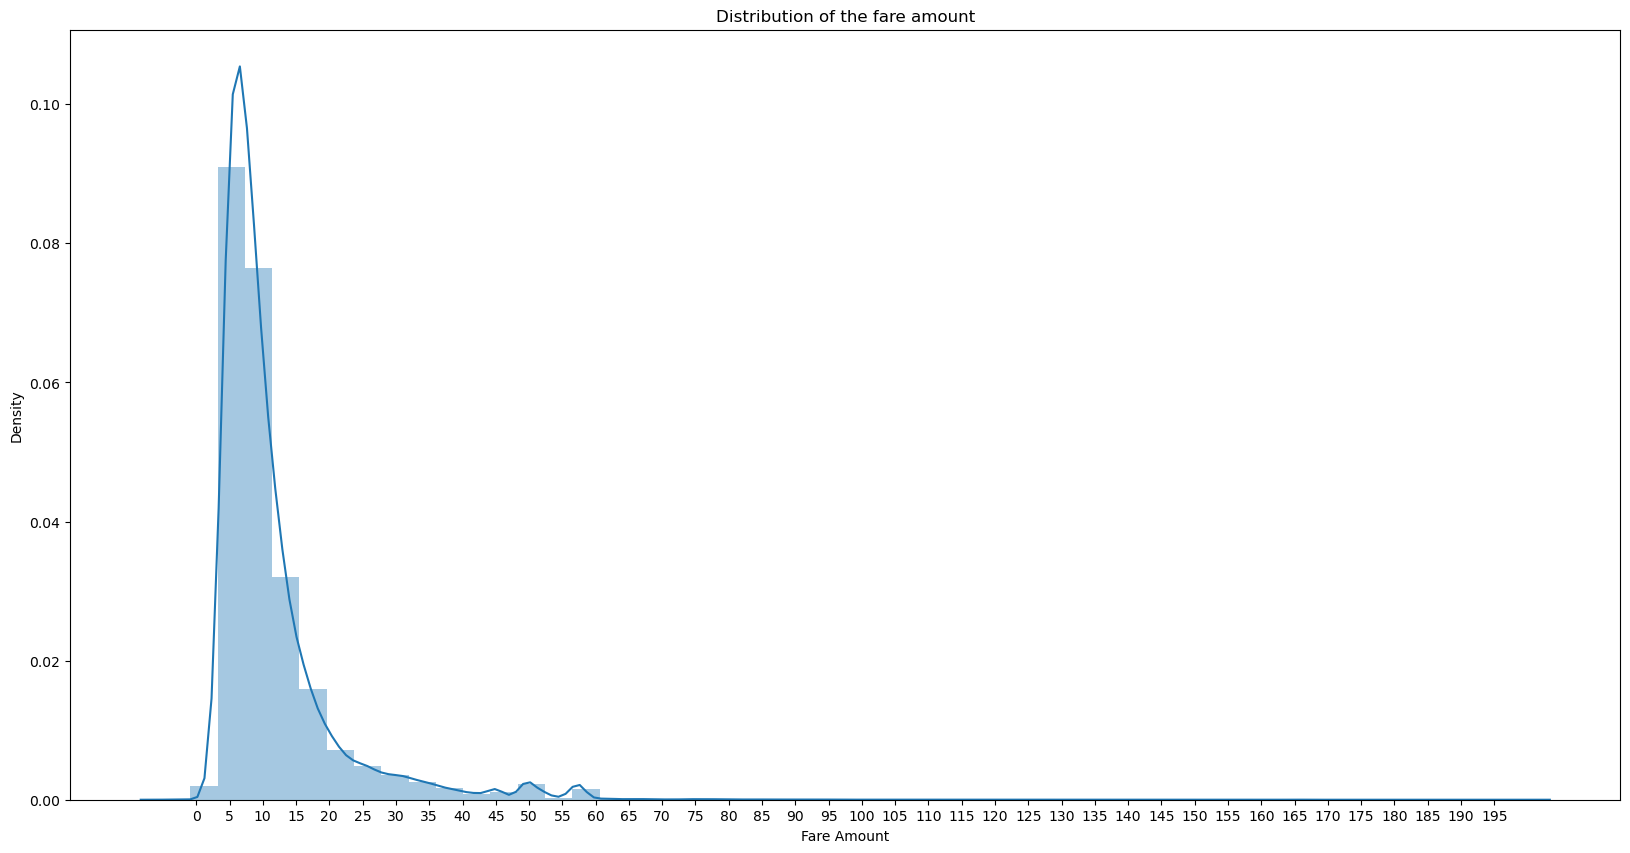

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(df_taxi.amount)
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.xticks(range(0,200,5))
plt.show()

<Axes: xlabel='amount'>

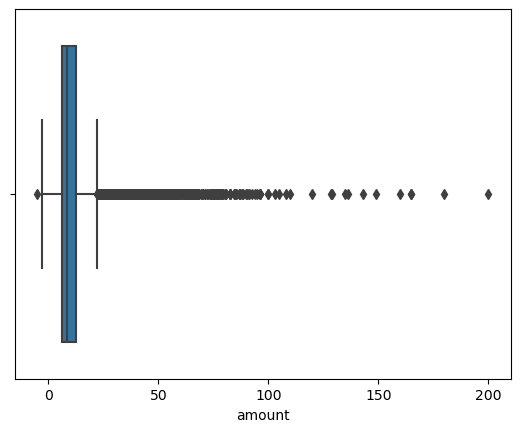

In [34]:
sns.boxplot(x = df.amount)

We can see that most the trips have a fare amount of 3 to 20 dollars. There are a few small peaks around 50 and 58 dollars as well.

In [35]:
df_taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


### Spliting the dataset into Dependent and independent features

In [36]:
X = df_taxi.drop('amount',axis=1)
y = df_taxi['amount']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Model 1:- Will build the base model

In [38]:
model1 = RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [40]:
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')

MSE_y_train =3.4779151588121726
MSE_y_test =20.491011323032907


In [41]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =1.8649169308074214
RMSE_y_test =4.5266998269194865


In [42]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.9638797606708202
test_r-squared =0.7671639075056651


# Grid-Search CV

In [ ]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Randomized Search CV

In [116]:
# Define the hyperparameters and their respective distributions
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}


In [117]:
model2 = RandomForestRegressor(n_estimators = 300,min_samples_split =5, min_samples_leaf=4,max_features ='log2',max_depth =30)

In [118]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [119]:
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [120]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =3.7948083017724983
RMSE_y_test =4.401295806976547


In [121]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.8504414245805855
test_r-squared =0.779885818024511
